In [1]:
%pip install flask_cors

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


https://pyautogui.readthedocs.io/en/latest/quickstart.html
https://pygetwindow.readthedocs.io/en/latest/#

In [2]:
%pip install pyautogui pywin32 pygetwindow pynput

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pyautogui # pip install pyautogui  
import win32gui # pip install pywin32
import pygetwindow as gw # pip install pygetwindow
from pynput import mouse # pip install pynput

In [2]:
# Take a screenshot of the specified region
def window_screen_shot(rect, name="screenshot.png"):
    
    # Extract individual elements from the rect tuple
    x, y, right, bottom = rect

    # Calculate width and height
    width = right - x
    height = bottom - y

    print(x, y, width, height)

    # Use these elements to define the region for the screenshot
    screenshot = pyautogui.screenshot(region=(x, y, width, height))
    screenshot.save(name)
    print("Screenshot saved as", name)



In [18]:
# Function to get the window coordinates
def get_window_coordinates(window_name):
    hwnd = win32gui.FindWindow(None, window_name)
    if hwnd:
        rect = win32gui.GetWindowRect(hwnd)
        return rect
    else:
        print(f"Window '{window_name}' not found!")
        return None
    

In [4]:
# print names of all windows
all_windows = gw.getAllTitles()
for w in all_windows:
    if w != "":
        print(w)
window_name = pyautogui.prompt(text='Enter the name of the window:', title='???' , default='')

● pip.ipynb - EdwardCody_CursorTrackerTool - Visual Studio Code
HTML Page with Images - Google Chrome
Drafts & sent - IE/HCI 6810 F24 Cog Engineering - Slack
Settings
Mail - Cody, Edward M - Outlook
Canvas - Calendar
Settings
NVIDIA GeForce Overlay
Windows Input Experience
Mail
Mail
Program Manager


In [22]:
rect = get_window_coordinates(window_name)
window_screen_shot(rect, name=window_name + ".png")

-8 -8 2576 1408
Screenshot saved as New Tab - Google Chrome.png


In [24]:
# active window
window_name = gw.getActiveWindowTitle()
rect = get_window_coordinates(window_name)
window_screen_shot(rect, name=window_name + ".png")

-8 -8 2576 1408
Screenshot saved as pip.ipynb - EdwardCody_CursorTrackerTool - Visual Studio Code.png


In [10]:
# Take a screenshot of the entire screen
screenshot = pyautogui.screenshot()

# Save the screenshot to a file
screenshot.save('full_screenshot.png')

In [11]:
print("screensize: ", pyautogui.size())

screensize:  Size(width=2560, height=1440)


In [6]:
import pyautogui
from pynput import mouse
import threading
import time

# Function to handle mouse click events
def on_click(x, y, button, pressed):
    if pressed:
        print(f"Mouse {button} clicked at ({x}, {y})")

# Start listening to mouse events
listener = mouse.Listener(on_click=on_click)
listener.start()

# Loop to print mouse position continuously
try:
    while True:
        print(pyautogui.position())
        time.sleep(0.1)  # Sleep for a short duration to avoid flooding the output
except KeyboardInterrupt: # Control+C to stop  but doesn't work in jupyter
    # Stop the listener when the script is interrupted
    listener.stop()

Point(x=2895, y=293)
Point(x=2902, y=294)
Point(x=3032, y=319)
Point(x=3077, y=336)
Point(x=3079, y=337)
Point(x=3079, y=337)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3079, y=339)
Point(x=3128, y=382)
Point(x=3378, y=599)
Point(x=3388, y=607)
Point(x=3303, y=529)
Point(x=3182, y=430)
Point(x=3176, y=427)
Point(x=3169, y=425)
Point(x=3117, y=407)
Point(x=3062, y=382)
Point(x=3000, y=326)
Point(x=2979, y=284)
Point(x=2957, y=283)
Point(x=2925, y=284)
Point(x=2904, y=290)
Point(x=2888, y=290)
Point(x=2885, y=289)
Mouse Button.left clicked at (2885, 289)
Point(x=2885, y=289)


In [4]:
%pip install screeninfo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# # heatmap with interior inset colorbar
# # It's actually petty tricky to make so that only the heatmap is shown, i.e. is not padded, etc.
# # I put the colorbar in an inset, so that the plot is not stretched to accommodate the colorbar.

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # Read in coordinates.csv
# df = pd.read_csv('data/mouse0.csv')

# # # Size the figure
# # plt.figure(figsize=(10, 6))

# # Create a figure and axes
# fig, ax = plt.subplots(figsize=(10, 5.625))

# # Set figure background to transparent
# fig.patch.set_alpha(0)
# ax.patch.set_alpha(0)

# # Create a KDE plot on the specified axes
# kde = sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True, ax=ax)

# # TO REMOVE LEGEND, COMMENT OUT FROM HERE...

# # Create an inset for the colorbar
# inset_ax = inset_axes(ax,
#                    width="5%",  # width of the colorbar
#                    height="50%",  # height of the colorbar
#                    loc='upper right',
#                    bbox_to_anchor=(-0.05, -0.03, 1, 1), # -0.15 moves the colorbar to the left and down
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)

# cbar = plt.colorbar(kde.collections[0], cax=inset_ax, orientation='vertical')
# cbar.ax.tick_params(labelsize=8)

# # rounnd the colorbar ticks label values
# tick_labels = cbar.ax.get_yticklabels()

# # Extract the text from the tick labels, round them, and set them back
# rounded_labels = [f'{float(label.get_text()):.2f}' for label in tick_labels]
# cbar.set_ticklabels(rounded_labels)

# # ...TO HERE

# # Remove axis labels and ticks
# ax.set_xlabel('')
# ax.set_ylabel('')
# ax.set_xticks([])
# ax.set_yticks([])

# # Ensure x and y axes have the same scale
# ax.set_aspect('equal', adjustable='box')

# # Remove the spines (borders) around the plot
# for spine in ax.spines.values():
#     spine.set_visible(False)

# # Adjust the layout to remove extra padding
# plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# # Save with transparent background
# plt.savefig('static/data/heatmap_transparent.png', transparent=True, bbox_inches='tight', pad_inches=0)

# # Show the plot
# plt.show()

2560
1440


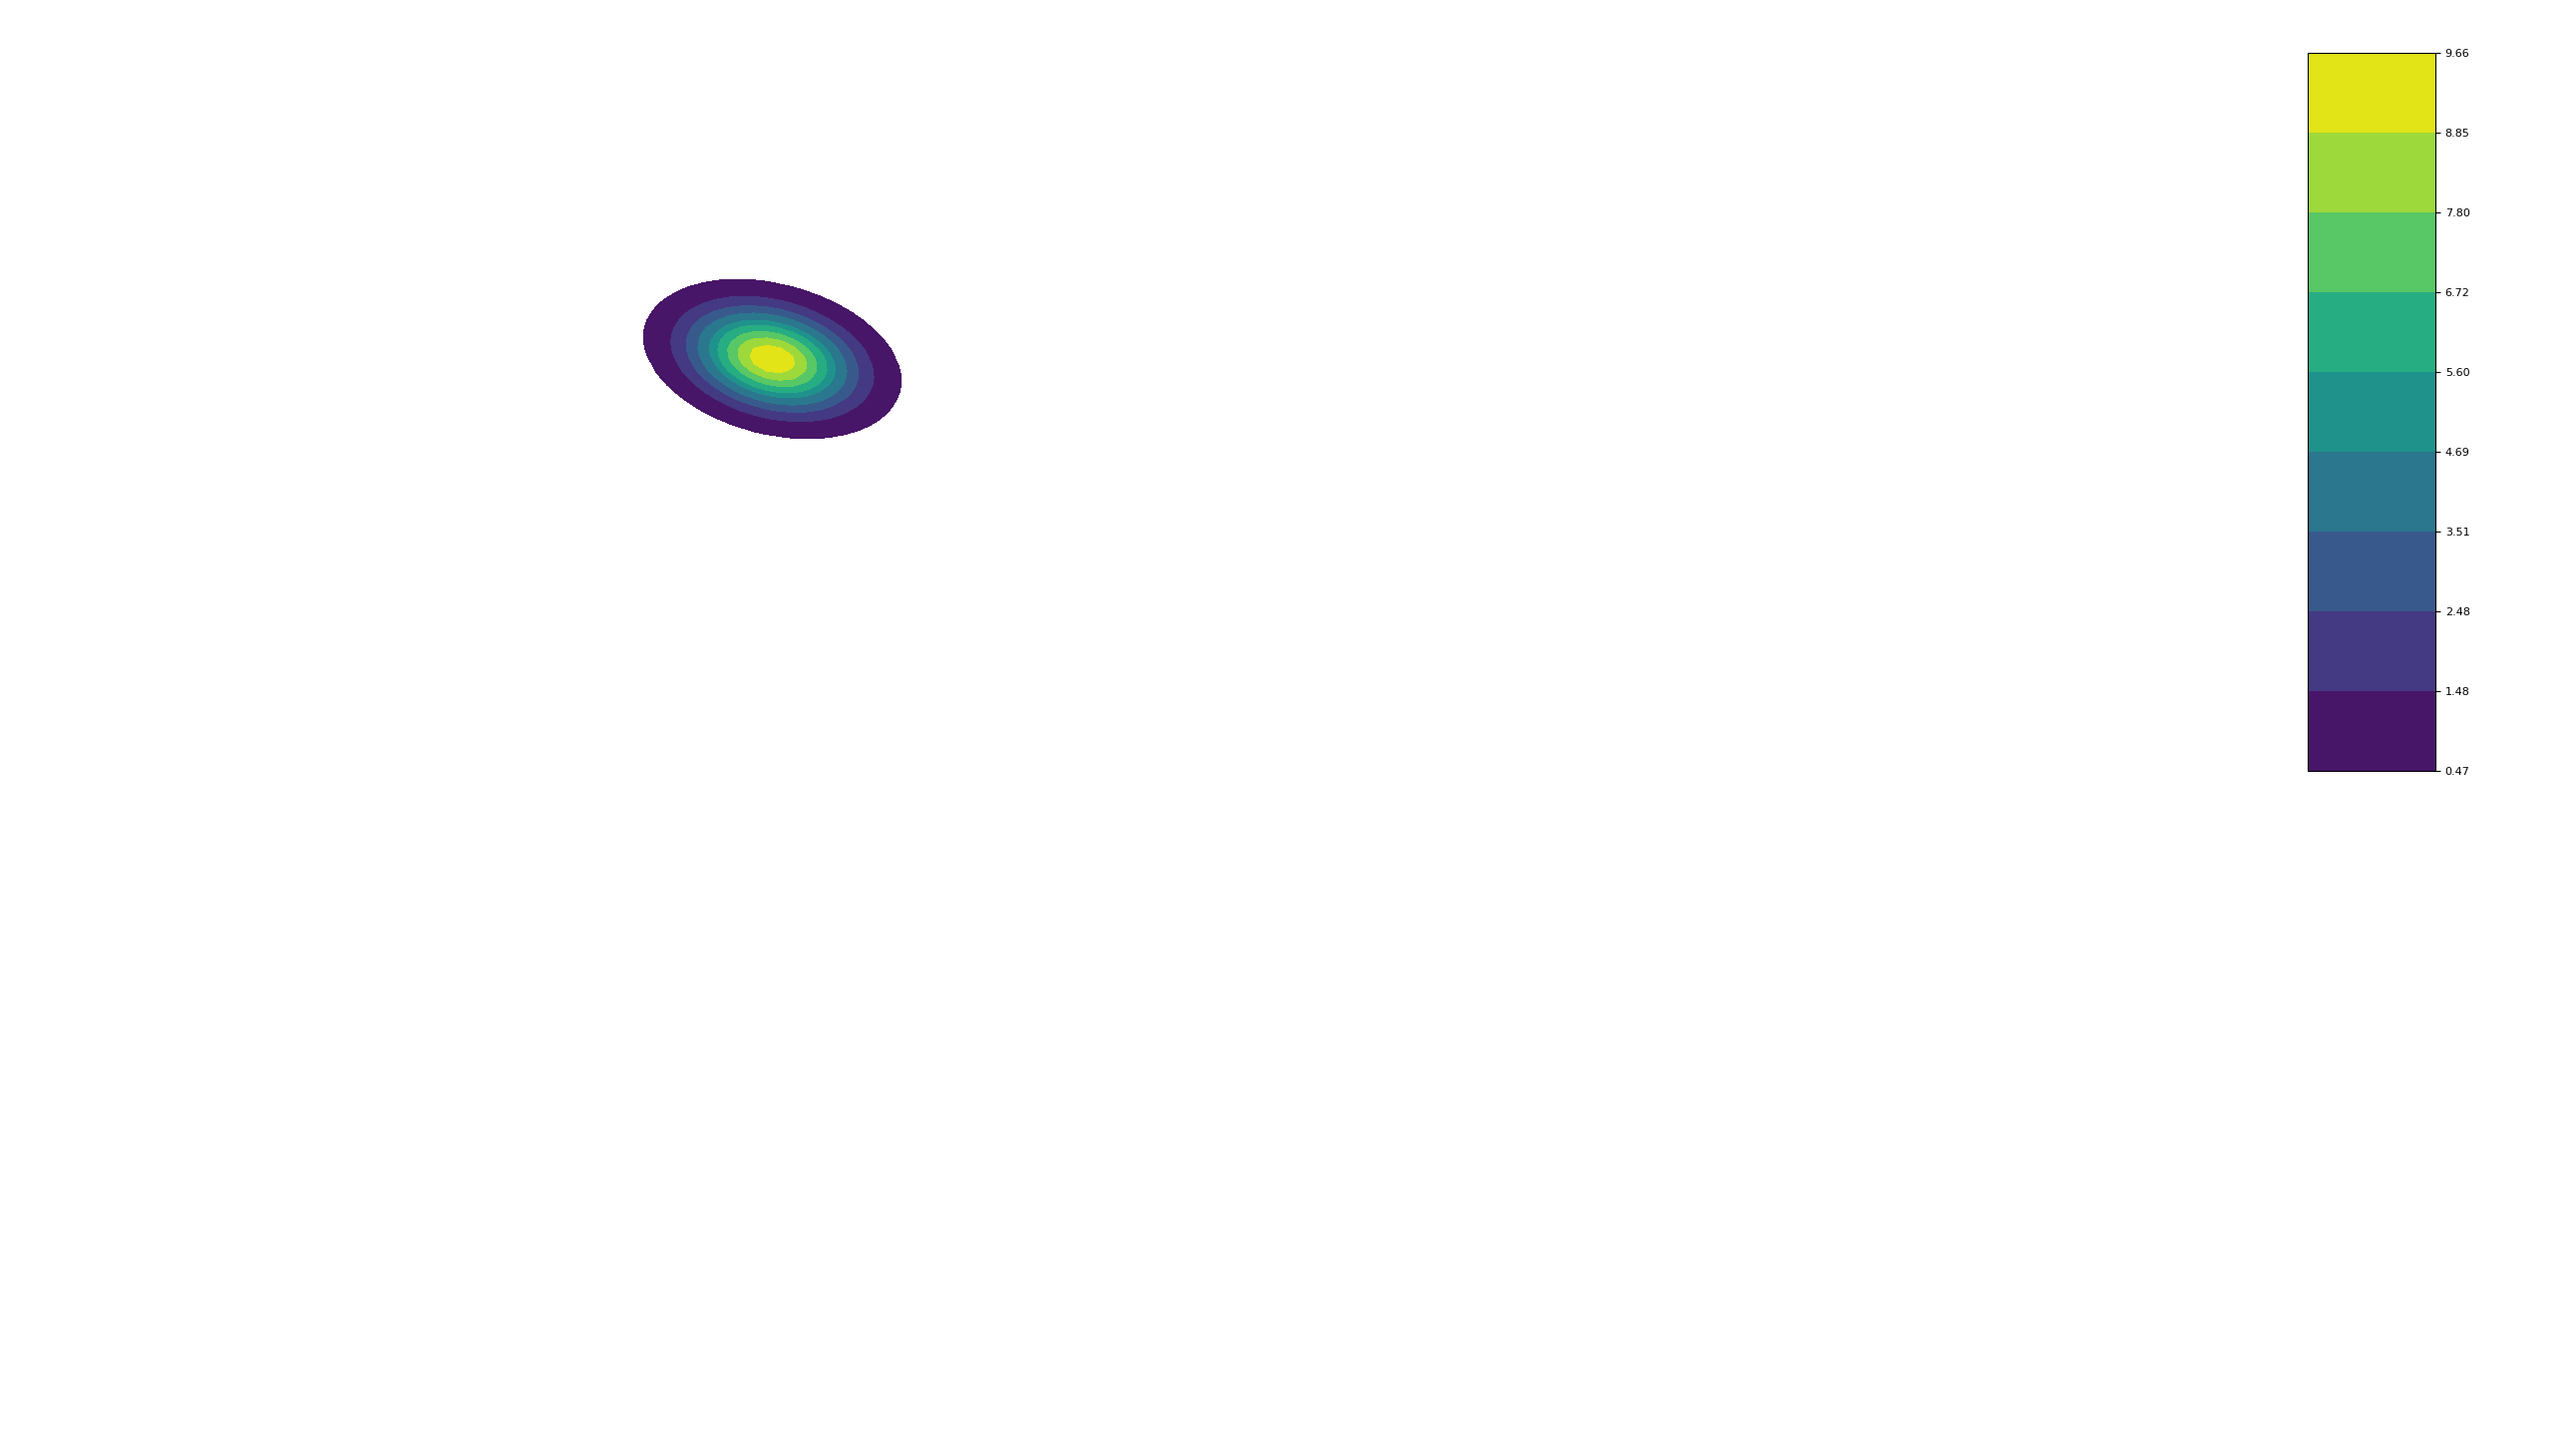

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from screeninfo import get_monitors  # Requires `screeninfo` library

# Read in coordinates.csv
df = pd.read_csv('data/mouse0.csv')

# Get screen dimensions
screen = get_monitors()[0]  # Assumes a single monitor setup; otherwise specify the desired monitor
# screen_size = max(screen.width, screen.height) / 100 # Scale down to make a manageable figure size  #Old render size code
screen_width = screen.width  #new render size code
screen_height = screen.height  #new render size code
print(screen_width)  #new render size code
print(screen_height)  #new render size code

# Calculate figsize in inches to match the screen resolution
fig_width_inch = screen_width / 100  # Scale down by 100 DPI (or use screen DPI if known)
fig_height_inch = screen_height / 100

# Create a square figure and axes
fig, ax = plt.subplots(figsize=(fig_width_inch, fig_height_inch))  # Set size to screen resolution
# fig, ax = plt.subplots(figsize=(10, 10))  # Square aspect ratio  #new render size code
# fig, ax = plt.subplots(figsize=(fig_width_inch, fig_height_inch))  # Set size to screen resolution


# Set figure background to transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Invert y-axis to match the coordinate system of the recorded data
ax.invert_yaxis()

# Create a KDE plot on the specified axes
# kde = sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True, ax=ax)  #Old render size code
kde = sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True, ax=ax, clip=((screen_width, 0), (0, screen_height)))  #new render size code

# Create an inset for the colorbar
inset_ax = inset_axes(ax,
                   width="5%",  # width of the colorbar
                   height="50%",  # height of the colorbar
                   loc='upper right',
                   bbox_to_anchor=(-0.05, -0.03, 1, 1),  # Adjust as needed
                   bbox_transform=ax.transAxes,
                   borderpad=0)

cbar = plt.colorbar(kde.collections[0], cax=inset_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)

# Round the colorbar tick labels
tick_labels = cbar.ax.get_yticklabels()
rounded_labels = [f'{float(label.get_text()):.2f}' for label in tick_labels]
cbar.set_ticklabels(rounded_labels)

# Remove axis labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_xticks([0, 1280, 2560])  #add labels for debugging
# ax.set_yticks([0, 720, 1440])  #add labels for debugging
ax.set_xticks([])
ax.set_yticks([])

# Ensure x and y axes have the same scale
ax.set_aspect('equal', adjustable='box')

# Remove the spines (borders) around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust the layout to remove extra padding
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save with transparent background in square aspect ratio
plt.savefig('static/data/heatmap_transparent.png', transparent=True, dpi=100, bbox_inches='tight', pad_inches=0)  #dpi added

# Show the plot
plt.show()


In [ ]:

# save plot as png with transparent background and 50% opacity
fig.savefig('heatmap.png', transparent=True, pad_inches=0, dpi=300)


In [18]:
import pyautogui

screenshot = pyautogui.screenshot()
screenshot.save('test_screenshot.png')


In [ ]:
current_page_number = 0
file_path = f'static/data/screenshot_page{current_page_number+1}.png'
screenshot.save(file_path)
print(f"Screenshot saved to {file_path}")

NameError: name 'current_page_number' is not defined